<a href="https://colab.research.google.com/github/suhashj/Machine-Learning-projects/blob/main/Genderpredict(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.getcwd()

'/home/4462b108'

In [ ]:
import pandas as pd
data = pd.read_csv("weight-height.csv")
print(data.shape)
print(data.columns)
print(data.dtypes)

(10000, 3)
Index(['Gender', 'Height', 'Weight'], dtype='object')
Gender     object
Height    float64
Weight    float64
dtype: object


In [ ]:
data['Gender'].value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

In [ ]:
data.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


In [ ]:
data.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

(10000, 3)


In [ ]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
data.columns
data['Gender'].replace(to_replace="Male",value=1,inplace=True)
data['Gender'].replace(to_replace="Female",value=0,inplace=True)

In [ ]:
data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data[["Weight","Height"]], 
                                      data['Gender'], test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7000, 2)
(3000, 2)
(7000,)
(3000,)


In [ ]:
from sklearn.linear_model  import LogisticRegression
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
trainpreds = log_model.predict(X_train)
testpreds = log_model.predict(X_test)

In [ ]:
trainpreds[0:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_train[0:10]

9069    0
2603    1
7738    0
1579    1
5058    0
5753    0
3548    1
409     1
4097    1
6461    0
Name: Gender, dtype: int64

In [ ]:
testpreds[0:10]

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
y_test[0:10]

6252    0
4684    1
1731    1
4742    1
4521    1
6340    0
576     1
5202    0
6363    0
439     1
Name: Gender, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
print("train accurracy",accuracy_score(y_train,trainpreds))
print("test accurracy",accuracy_score(y_test,testpreds))

train accurracy 0.918955223880597
test accurracy 0.9206060606060606


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,trainpreds)

array([[3110,  268],
       [ 275, 3047]])

In [ ]:
confusion_matrix(y_test,testpreds)

array([[1480,  142],
       [ 120, 1558]])

In [ ]:
from sklearn.metrics import recall_score,f1_score,precision_score
#print(recall_score(train_pred))

In [ ]:
log_model.predict_proba(X_train)[0:10]

array([[9.74557684e-01, 2.54423159e-02],
       [9.38816003e-01, 6.11839973e-02],
       [9.59751267e-01, 4.02487330e-02],
       [1.82065809e-02, 9.81793419e-01],
       [4.53384925e-01, 5.46615075e-01],
       [9.95311064e-01, 4.68893622e-03],
       [6.17422156e-01, 3.82577844e-01],
       [2.47373811e-04, 9.99752626e-01],
       [3.37567065e-03, 9.96624329e-01],
       [9.05417172e-01, 9.45828280e-02]])

In [ ]:
trainpreds[0:10]

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [ ]:
log_model

LogisticRegression()

In [ ]:
print(log_model.coef_)
print(log_model.intercept_)

[[ 0.19590226 -0.4759253 ]]
[-0.00994489]


In [ ]:
#0.1959*Weight-0.47*Height-0.009
# exp(y)/(1+exp(y)); 1/(1+exp-(y))

In [ ]:
data1 = data
data1['Gender'].replace(to_replace="Male",value=1,inplace=True)
data1['Gender'].replace(to_replace="Female",value=0,inplace=True)

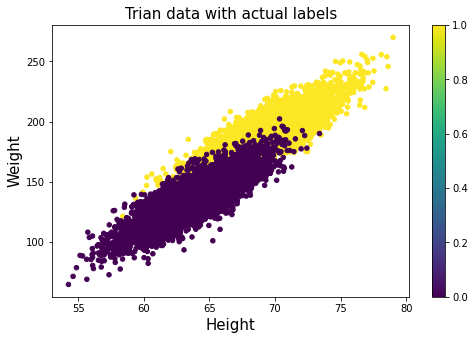

In [ ]:
from matplotlib import pyplot as plt
def plotdata(x,y,label):
    plt.scatter(x,y, c=label, s=20)
    plt.xlabel("Height",fontsize=15)
    plt.ylabel("Weight",fontsize=15)
    cbar= plt.colorbar()
    plt.show(True)
plt.figure(figsize=(8,5))
plt.title("Trian data with actual labels",fontsize=15)
plotdata(data['Height'],data['Weight'],data['Gender'])
plt.show(True)

In [ ]:
datapreds = log_model.predict(data[["Weight","Height"]])
print(datapreds)


[1 0 1 ... 0 0 0]


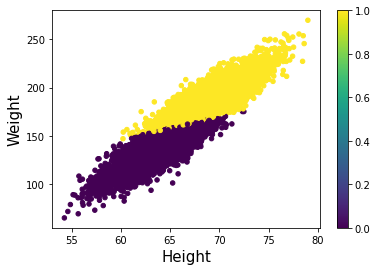

In [ ]:
plotdata(data['Height'],data['Weight'],datapreds)